In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/CPN Dataset

/content/drive/My Drive/CPN Dataset


In [ ]:
ls

'Copy of CPN Model.ipynb'   COVID-19.jpg   Normal/   'Viral Pneumonia'/
 COVID/                     CPN_Model.h5   plot.png


In [ ]:
pip install np_utils

     |████████████████████████████████| 61 kB 7.3 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=9142ef581a65a67643bb9886476339e0083cf6c011fb10ea3bf5789b38334b73
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


**TRAINING/TESTING MODEL**

In [ ]:
#libraries required to train the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_dir="/content/drive/My Drive/CPN Dataset"

In [ ]:
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='png'): #using list slicing we can fetch the last 'n' elements from list
            imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to list imgpath

/content/drive/My Drive/CPN Dataset ['COVID', 'Viral Pneumonia', 'Normal'] ['Copy of CPN Model.ipynb', 'CPN_Model.h5']
/content/drive/My Drive/CPN Dataset/COVID [] ['COVID-2610.png', 'COVID-2595.png', 'COVID-2605.png', 'COVID-2627.png', 'COVID-2633.png', 'COVID-2629.png', 'COVID-2644.png', 'COVID-2643.png', 'COVID-2636.png', 'COVID-2638.png', 'COVID-2635.png', 'COVID-2624.png', 'COVID-2632.png', 'COVID-2631.png', 'COVID-2642.png', 'COVID-2622.png', 'COVID-2628.png', 'COVID-2625.png', 'COVID-2640.png', 'COVID-2626.png', 'COVID-2621.png', 'COVID-2634.png', 'COVID-2641.png', 'COVID-2620.png', 'COVID-2637.png', 'COVID-2630.png', 'COVID-2623.png', 'COVID-2639.png', 'COVID-2659.png', 'COVID-2668.png', 'COVID-2654.png', 'COVID-2657.png', 'COVID-2664.png', 'COVID-2650.png', 'COVID-2651.png', 'COVID-2669.png', 'COVID-2649.png', 'COVID-2656.png', 'COVID-2655.png', 'COVID-2666.png', 'COVID-2661.png', 'COVID-2665.png', 'COVID-2663.png', 'COVID-2653.png', 'COVID-2648.png', 'COVID-2662.png', 'COVID-

In [ ]:
#initialize the list of image data and target labels
data=[]
target=[]
resize=150

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'} #dictionary to map file label name with target label name

In [ ]:
for imgpaths in tqdm(imgpath):  #tqdm is used to make terminal progress bar
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 #resizing the image
    

    #updates the respective data and target label lists
    data.append(image)
    target.append(dic[label])

100%|██████████| 9951/9951 [27:57<00:00,  5.93it/s]


In [ ]:
print(len(data)) #to know length of data

9951


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


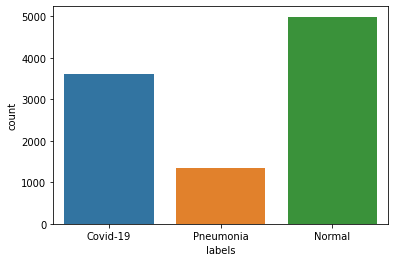

In [ ]:
#box plot and counting the lables
df=pd.DataFrame(target,columns=['labels'])
sns.countplot(df['labels'])
plt.show()

In [ ]:
size=[]
for file in imgpath: #for loop to get image paths
    img=plt.imread(file) #used to read an image from a file into an array
    size.append(img.shape) #image.shape returns a tuple of the number of rows, columns, and channels (if the image is color).
pd.Series(size).value_counts() #it retures a series containing counts of unique values

(299, 299)       9811
(299, 299, 3)     140
dtype: int64

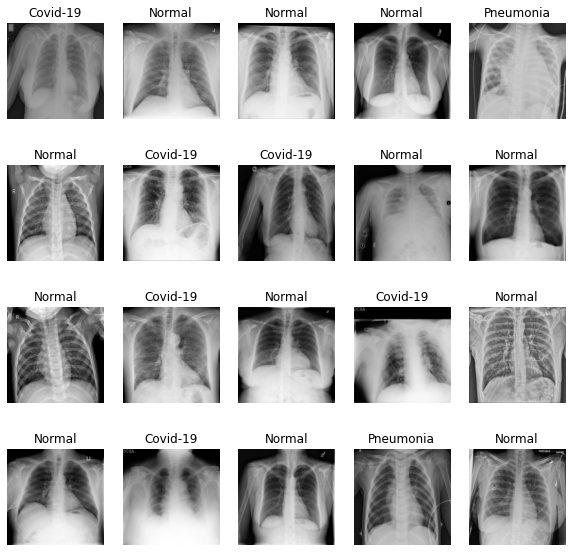

In [ ]:
plt.figure(figsize=(10,10)) #to change the size of the images
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : #enumerate() to get a counter and the value from the iterable at the same time and random.randit() to generate randome images from image path
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()

In [ ]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(target) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [ ]:
#spliting data into training and testing (80-20 Ratio)

(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(7960, 150, 150, 3)
(1991, 150, 150, 3)
(7960, 3)
(1991, 3)


In [ ]:
trainX[0]

array([[[0.12156863, 0.12156863, 0.12156863],
        [0.12156863, 0.12156863, 0.12156863],
        [0.12156863, 0.12156863, 0.12156863],
        ...,
        [0.54901961, 0.54901961, 0.54901961],
        [0.34901961, 0.34901961, 0.34901961],
        [0.13333333, 0.13333333, 0.13333333]],

       [[0.        , 0.        , 0.        ],
        [0.03137255, 0.03137255, 0.03137255],
        [0.07058824, 0.07058824, 0.07058824],
        ...,
        [0.39215686, 0.39215686, 0.39215686],
        [0.21568627, 0.21568627, 0.21568627],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.        , 0.        , 0.        ],
        [0.30980392, 0.30980392, 0.30980392],
        [0.35686275, 0.35686275, 0.35686275],
        ...,
        [0.68235294, 0.68235294, 0.68235294],
        [0.14901961, 0.14901961, 0.14901961],
        [0.10196078, 0.10196078, 0.10196078]],

       ...,

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
#CNN Model
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

In [ ]:
#compile
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 128)       0

In [ ]:
data=[]

In [ ]:
imgpath=[]

In [ ]:
df=[]

In [ ]:
size=[]

In [ ]:
#will train model upto 20 epochs
epochs=20
batch_size=64

ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)

Epoch 1/20
124/124 [==============================] - 357s 3s/step - loss: 1.0872 - accuracy: 0.7296 - val_loss: 0.3240 - val_accuracy: 0.8735
Epoch 2/20
124/124 [==============================] - 355s 3s/step - loss: 0.3048 - accuracy: 0.8779 - val_loss: 0.2648 - val_accuracy: 0.9007
Epoch 3/20
124/124 [==============================] - 354s 3s/step - loss: 0.2502 - accuracy: 0.9032 - val_loss: 0.2344 - val_accuracy: 0.9194
Epoch 4/20
124/124 [==============================] - 355s 3s/step - loss: 0.2144 - accuracy: 0.9210 - val_loss: 0.2121 - val_accuracy: 0.9269
Epoch 5/20
124/124 [==============================] - 356s 3s/step - loss: 0.1729 - accuracy: 0.9367 - val_loss: 0.1873 - val_accuracy: 0.9395
Epoch 6/20
124/124 [==============================] - 354s 3s/step - loss: 0.1395 - accuracy: 0.9510 - val_loss: 0.1806 - val_accuracy: 0.9400
Epoch 7/20
124/124 [==============================] - 354s 3s/step - loss: 0.1272 - accuracy: 0.9543 - val_loss: 0.1919 - val_accuracy: 0.9491

In [ ]:
model.save('/content/drive/My Drive/CPN Dataset/CPN_Model.h5')

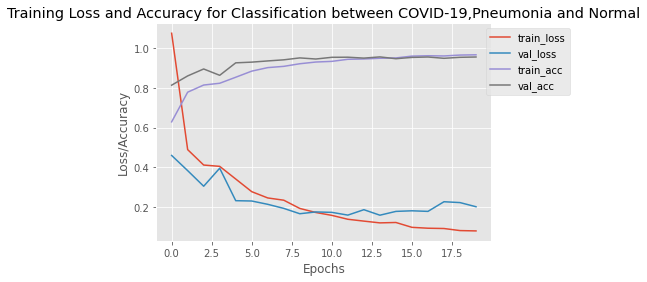

In [ ]:
#loss/accuracy graph
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [ ]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.23253661394119263
Test Accuracy is: 0.9517830014228821


In [ ]:
modelLoss=[]

In [ ]:
modelAccuracy=[]

In [ ]:
#classification report on train
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

              precision    recall  f1-score   support

    Covid-19      0.998     0.999     0.998      2892
      Normal      0.999     0.998     0.998      3992
   Pneumonia      0.995     0.999     0.997      1076

    accuracy                          0.998      7960
   macro avg      0.998     0.998     0.998      7960
weighted avg      0.998     0.998     0.998      7960



In [ ]:
predIdxs=[]

In [ ]:
#classification report on test
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

              precision    recall  f1-score   support

    Covid-19      0.930     0.965     0.947       724
      Normal      0.970     0.943     0.956       998
   Pneumonia      0.948     0.948     0.948       269

    accuracy                          0.952      1991
   macro avg      0.949     0.952     0.950      1991
weighted avg      0.952     0.952     0.952      1991



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[699  21   4]
 [ 47 941  10]
 [  6   8 255]]


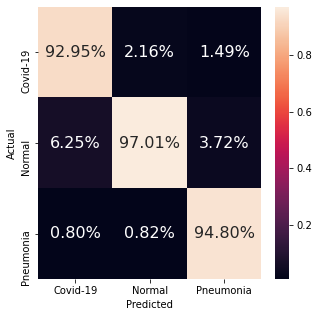

In [ ]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()

**PREDICTING THE OUTPUT**

In [ ]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('/content/drive/MyDrive/CPN Dataset/CPN_Model.h5')

In [ ]:
#necessary libraries
from numpy import asarray
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
#image paths
covid_img_path="/content/drive/MyDrive/CPN Dataset/COVID/COVID-19.png"
normal_img_path="/content/drive/MyDrive/CPN Dataset/Normal/Normal-500.png"
pneumonia_img_path="/content/drive/MyDrive/CPN Dataset/Viral Pneumonia/Viral Pneumonia-1000.png"

img_paths=[covid_img_path, normal_img_path, pneumonia_img_path]

In [ ]:
print(img_paths)

['/content/drive/MyDrive/CPN Dataset/COVID/COVID-19.png', '/content/drive/MyDrive/CPN Dataset/Normal/Normal-500.png', '/content/drive/MyDrive/CPN Dataset/Viral Pneumonia/Viral Pneumonia-1000.png']


In [ ]:
#preprocessing the image
resize=150

images=[]

for img_path in img_paths:
  img_path=cv2.imread(img_path)
  img_path=cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB) 
  img_path=cv2.resize(img_path, (resize, resize)) /255
  images.append(img_path)

In [ ]:
#printing image shape
count=0
for _ in images:
  images[count]=np.array(images[count])
  images[count]=np.expand_dims(images[count], axis=0)
  print(images[count].shape)
  count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


In [ ]:
#prediction
prediction=[]
for i in images:
  prediction.append(model.predict(i))

In [ ]:
#output of prediction
output=[]
for p in prediction:
  output.append(np.argmax(p,axis=1))

In [ ]:
#0: COVID-19
#1: Normal
#2: Pneumonia

title=[]

for out in output:
  if out==0:
    title.append('COVID-19')
  elif out==1:
    title.append('Normal')
  else:
    title.append('Pneumonia')

print(title)

['COVID-19', 'Normal', 'Pneumonia']


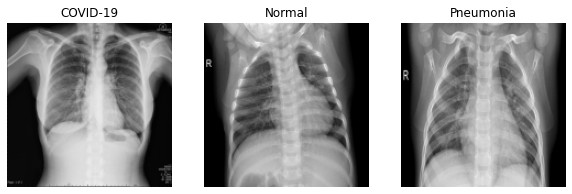

In [ ]:
#printing the images with predicted output
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

i=0

for img in images:
  plt.subplot(1,3,i+1)
  plt.imshow(np.squeeze(img) , cmap='gray')
  plt.title(title[i])
  plt.axis('off')  
  i+=1   
plt.show()